In [63]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [144]:
import matplotlib.cm as cmap

In [96]:
from sklearn import ensemble, preprocessing

In [97]:
dataframes = {}

files = !ls input/
for f in [f for f in files if f.endswith('.csv')]:
    datecol = ['Date'] if f != 'sampleSubmission.csv' else None
    dataframes[f] = pd.read_csv('input/' + f, parse_dates=datecol)


In [98]:
dataframes.keys()

dict_keys(['test.csv', 'spray.csv', 'train.csv', 'sampleSubmission.csv', 'weather.csv'])

In [114]:
dataframes["train.csv"].head()
train = dataframes["train.csv"]
weather = dataframes["weather.csv"]
spray = dataframes["spray.csv"]

In [106]:
#print(train.Species.value_counts())
print(train.Address.value_counts().size)

138


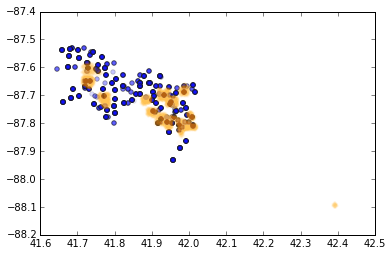

In [142]:
plt.scatter(train.Latitude, train.Longitude, alpha=0.05)
plt.scatter(spray.Latitude, spray.Longitude, alpha=0.01, color="orange")

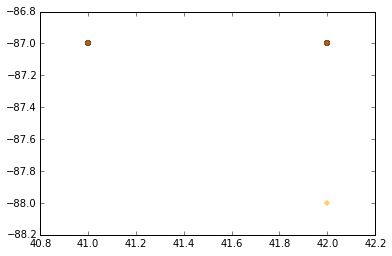

In [140]:
plt.scatter(train.Latitude.values.astype(np.int), train.Longitude.values.astype(np.int), alpha=0.05)
plt.scatter(spray.Latitude.values.astype(np.int), spray.Longitude.values.astype(np.int), alpha=0.01, color="orange")

(1760, 1311)
41.644612 42.01743
-87.930995 -87.531635


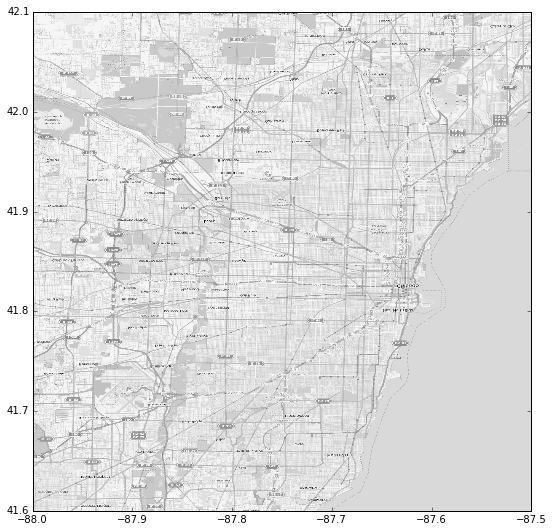

In [165]:

mapdata = np.loadtxt("./input/mapdata_copyright_openstreetmap_contributors.txt")
print(mapdata.shape)
print(train.Latitude.min(), train.Latitude.max())
print(train.Longitude.min(), train.Longitude.max())
lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(12, 1311/1760 * 12))
plt.imshow(mapdata, cmap=cmap.Greys_r, origin='lower', extent=lon_lat_box)
#plt.scatter(train.Latitude, train.Longitude, alpha=0.05)


In [135]:
species_group = train.groupby("Species")
outcomes = species_group["WnvPresent"].agg([np.sum, np.size])
print(outcomes)
del species_group

                        sum  size
Species                          
CULEX ERRATICUS           0     1
CULEX PIPIENS           240  2699
CULEX PIPIENS/RESTUANS  262  4752
CULEX RESTUANS           49  2740
CULEX SALINARIUS          0    86
CULEX TARSALIS            0     6
CULEX TERRITANS           0   222


In [138]:
train["year"] = pd.DatetimeIndex(train.Date).year
year_group = train.groupby("year")
outcomes = year_group["WnvPresent"].agg([np.sum, np.size])
print(outcomes)
del year_group

      sum  size
year           
2007  236  3811
2009   19  2249
2011   57  2054
2013  239  2392


In [83]:
spray = dataframes['spray.csv']
spray["Timestamp"] = pd.to_datetime(spray.Date.apply(str) + " " + spray.Time)
print(dataframes['spray.csv'].head())

        Date        Time   Latitude  Longitude           Timestamp
0 2011-08-29  6:56:58 PM  42.391623 -88.089163 2011-08-29 18:56:58
1 2011-08-29  6:57:08 PM  42.391348 -88.089163 2011-08-29 18:57:08
2 2011-08-29  6:57:18 PM  42.391022 -88.089157 2011-08-29 18:57:18
3 2011-08-29  6:57:28 PM  42.390637 -88.089158 2011-08-29 18:57:28
4 2011-08-29  6:57:38 PM  42.390410 -88.088858 2011-08-29 18:57:38


2011-08-29 00:00:00
2013-09-05 00:00:00


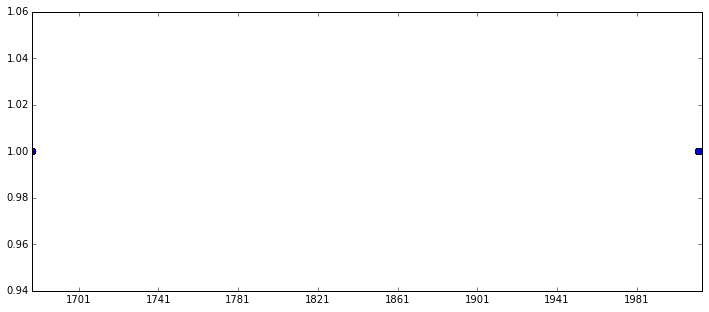

In [94]:
print(spray.Date.min())
print(spray.Date.max())
plt.plot_date(spray.Timestamp, np.ones(spray.shape[0]))
fig = plt.gcf()
fig.set_size_inches(12, 5)

In [72]:
# print(dataframes['weather.csv'].head())
# for station in (1, 2):
#     data = dataframes['weather.csv']
#     print(data.shape)
#     data = data[data['Station'] == station]
#     print(data.shape)
#     dates = data['Date']
#     Tavg = data['Tavg']
#     #plt.plot(dates.values, Tavg.values, '-')

    
DF = dataframes['weather.csv']
station1 = DF[DF.Station == 1]
station2 = DF[DF.Station == 2]
print(DF.head())
del DF

   Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-01    83    50   67     14        51      56    0    2   
1        2 2007-05-01    84    52   68      M        51      57    0    3   
2        1 2007-05-02    59    42   51     -3        42      47   14    0   
3        2 2007-05-02    60    43   52      M        42      47   13    0   
4        1 2007-05-03    66    46   56      2        40      48    9    0   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...                0      M      0.0        0.00       29.10    29.82   
1    ...                M      M        M        0.00       29.18    29.82   
2    ...         BR     0      M      0.0        0.00       29.38    30.09   
3    ...      BR HZ     M      M        M        0.00       29.44    30.08   
4    ...                0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.

In [65]:
station2.Tavg = (station2.Tavg.replace('M', np.nan)).astype(np.float)


/usr/local/lib/python3.4/site-packages/pandas/core/generic.py:2110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


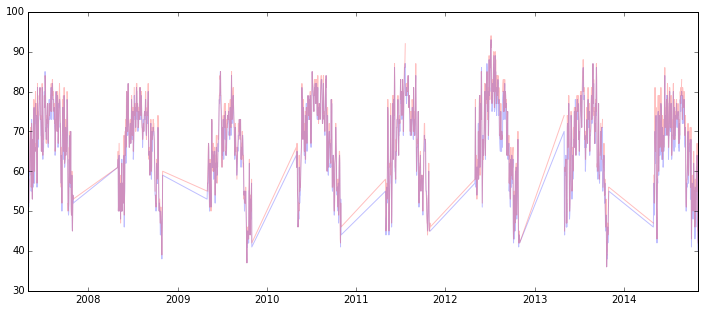

In [70]:
plt.plot_date(station1.Date, station1.Tavg, '-', alpha=0.25)
plt.plot_date(station2.Date, station2.Tavg, '-', alpha=0.25, color='red')
fig = plt.gcf()
fig.set_size_inches(12, 5)